## Principal Component Analysis
Large number of features in the dataset is one of the factors that affect both the training time as well as accuracy of machine learning models. You have different options to deal with huge number of features in a dataset.

1. Try to train the models on original number of features, which take days or weeks if the number of features is too high.
2. Reduce the number of variables by merging correlated variables.
3. Extract the most important features from the dataset that are responsible for maximum variance in the output. Different statistical techniques are used for this purpose e.g. linear discriminant analysis, factor analysis, and principal component analysis.

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

### Steps to perform PCA
1. Collect and clean data.
2. Standardize data using the Scikit-learn StandardScaler() class.
3. Create a PCA model (pca_1) with PCA(n_components=None) and train the model with standardized data. n_components=None means we keep all the components for now.
3. Select the best number of principal components for the dataset by creating the plot discussed in Question 14.
4. Create another PCA model (pca_2) with PCA(n_components=k) and train the model with standardized data. Here, k is the best number of principal components we selected earlier.
5. Get the transformed dataset by using the pca_2.transform() method.

### Advantages of PCA
There are two main advantages of dimensionality reduction with PCA.

The training time of the algorithms reduces significantly with less number of features.
It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.
### Normalization of Features
It is imperative to mention that a feature set must be normalized before applying PCA. For instance if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

Finally, the last point to remember before we start coding is that PCA is a statistical technique and can only be applied to numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.

In [24]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# importing dataset
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# obtaining features and labels
X = df.iloc[: , :-1]
y= df.iloc[: , -1]

In [27]:
# splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

As PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA
It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. Therefore, PCA can be considered as an unsupervised machine learning technique.

Performing PCA using Scikit-Learn is a two-step process:

1. Initialize the PCA class by passing the number of components to the constructor.
2. Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_p = pca.fit_transform(X_train)
X_test_p  = pca.transform(X_test)

In the code above, we create a PCA object named pca. We did not specify the number of components in the constructor. Hence, all four of the features in the feature set will be returned for both the training and test sets.

## Explained_variance_ratio_
The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.

In [30]:
pca.explained_variance_ratio_

array([0.72229951, 0.2397406 , 0.03335483, 0.00460506])

The explained_variance variable is now a float type array which contains variance ratios for each principal component.
It can be seen that first principal component is responsible for 72.22% variance. Similarly, the second principal component causes 23.9% variance in the dataset. Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained in the feature set is captured by the first two principal components.

## How to Select the Best Number of Principal Components for the Dataset

Plot the explained variance percentage of individual components and the percentage of total variance captured by all principal components.

This is the most advanced and effective method that can be used to select the best number of principal components for the dataset.



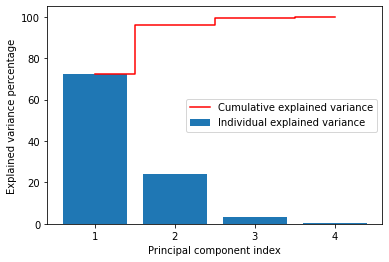

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_p = pca.fit_transform(X_train)
X_test_p  = pca.transform(X_test)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 5), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 5), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')

The number of bars is equal to the number of variables in the original dataset. In this plot, each bar shows the explained variance percentage of individual components and the step plot shows the cumulative explained variance percentages.

By looking at this plot, we can easily decide how many components should be kept. In this example, only the first two components capture almost all the variance in the dataset. So, we decide to select only the first two components.

Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train_p1 = pca.fit_transform(X_train)
X_test_p1  = pca.transform(X_test)

In [33]:
# using random forest classification for making the predictions.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_p1, y_train)

y_pred = clf.predict(X_test_p1)

In [34]:
# performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy:  0.9333333333333333


It can be seen from the output that with only one feature, the random forest algorithm is able to correctly predict 28 out of 30 instances, resulting in 93.33% accuracy.

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_p2 = pca.fit_transform(X_train)
X_test_p2  = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_p2, y_train)
y_pred = clf.predict(X_test_p2)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)

[[11  0  0]
 [ 0  9  4]
 [ 0  2  4]]
Accuracy:  0.8


Here the number of components for PCA has been set to 2. The classification results with 2 components are given above:
With two principal components the classification accuracy decreases to 80% compared to 93.33% for 1 component.

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_p3 = pca.fit_transform(X_train)
X_test_p3  = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_p3, y_train)
y_pred = clf.predict(X_test_p3)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)

[[11  0  0]
 [ 0  8  5]
 [ 0  1  5]]
Accuracy:  0.8


Here the number of components for PCA has been set to 3. The classification results with 2 components are given above:
With two principal components the classification accuracy decreases to 80% compared to 93.33% for 1 component.

## Results with Full Feature Set
Let's try to find the results with full feature set. To do so, simply remove the PCA part from the script that we wrote above. The results with full feature set, without applying PCA looks like this:

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy:  1.0


Discussion
From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is not bad when comparing the accuracy achieved with will feature set i.e. 100%. It is also pertinent to mention that the accuracy of a classifier doesn't necessarily improve with increased number of principal components. From the results we can see that the accuracy achieved with one principal component (93.33%) was greater than the one achieved with two principal components (80%).

The number of principal components to retain in a feature set depends on several conditions such as storage capacity, training time, performance, etc. In some dataset all the features are contributing equally to the overall variance, therefore all the principal components are crucial to the predictions and none can be ignored. A general rule of thumb is to take number of principal of principal components that contribute to significant variance and ignore those with diminishing variance returns. A good way is to plot the variance against principal components and ignore the principal components with diminishing values.